## Exercise: Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) 
Perform a similar alanlaysis as above on this dataset with the following sections:
High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
Explain our objective.
Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"./haberman.csv", names=['age', 'year_of_operation', 'axillary_nodes', 'survival_status'])

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [3]:
df.shape

(306, 4)

In [4]:
df.head(5)

,age,year_of_operation,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df['year_of_operation'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year_of_operation, dtype: int64

In [6]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [7]:
df.tail()

,age,year_of_operation,axillary_nodes,survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


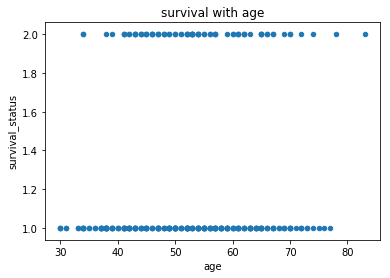

In [8]:
df.plot(kind='scatter', x='age', y='survival_status')
plt.title('survival with age')
plt.show()

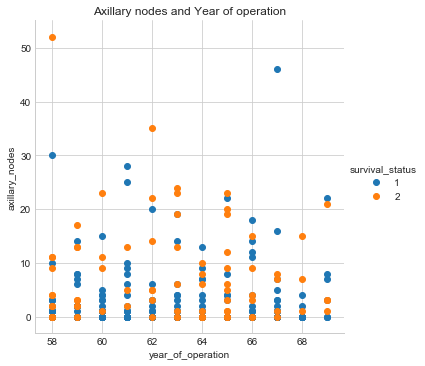

In [9]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='survival_status', size=5) \
   .map(plt.scatter, 'year_of_operation', 'axillary_nodes') \
   .add_legend()
plt.title('Axillary nodes and Year of operation')
plt.show()

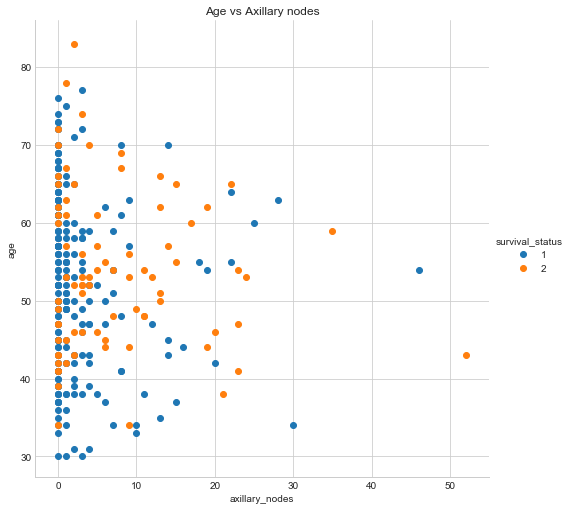

In [10]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='survival_status', size=7) \
   .map(plt.scatter, 'axillary_nodes', 'age') \
   .add_legend()
plt.title('Age vs Axillary nodes')
plt.show()


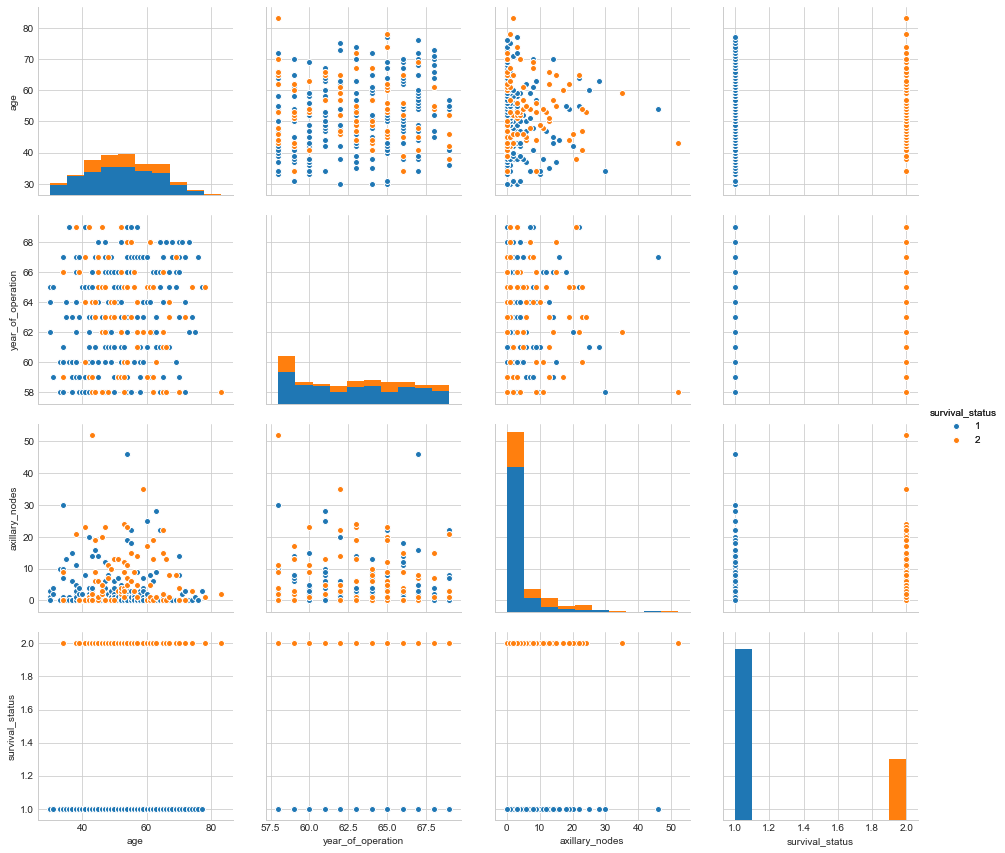

In [11]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(df, hue='survival_status', size=3) \
   .add_legend()
plt.show()

### Looking at the pair plots, Nothing much could be concluded about the data, which can help in classifying the data

In [12]:
survived=df[df['survival_status']==1]
not_survived=df[df['survival_status']==2]

In [ ]:
sns.FacetGrid(df, hue='survival_status') \
   .map(sns.distplot, 'age') \
   .add_legend()
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('Pdf plots')
plt.show()

## PDF for Survival status is very much over-lapped.
## Therefore age alone can not help in distinguishing the survival status.

In [ ]:
sns.FacetGrid(df, hue='survival_status') \
   .map(sns.distplot, 'axillary_nodes') \
   .add_legend()
plt.xlabel("axillary_nodes")
plt.ylabel("survival status")
plt.title('Pdf plots')
plt.show()

## PDF for Survival status is very much over-lapped.
## Therefore, axillary nodes alone can not help in distinguishing the survival status.
## Though, this can be concluded that no. of axillary nodes serve a better purpose as compared to age of the patient.

In [ ]:
sns.FacetGrid(df, hue='survival_status') \
   .map(sns.distplot, 'year_of_operation') \
   .add_legend()
plt.xlabel("year of operation")
plt.ylabel("survival status")
plt.title('Pdf plots')
plt.show()

## PDF for Survival status is very much over-lapped.
## Therefore, year of operation can not help in distinguishing the survival status.

In [ ]:
count, bin_edges=np.histogram(survived['age'], bins=10, density=True)
pdf=count/sum(count)
print(count)
print(bin_edges)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
np.histogram(survived['age'], bins=20, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('PDF and CDF Plots')
plt.show()

In [ ]:
#survived
count, bin_edges=np.histogram(not_survived['age'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survived status")
plt.title('Pdf plots')

plt.show()

In [ ]:
#not_survive
count, bin_edges=np.histogram(survived['age'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survived status")
plt.title('Pdf plots')

plt.show()

In [ ]:
#survived
count, bin_edges=np.histogram(not_survived['axillary_nodes'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('PDF and CDF plots')